In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plot


# 用pandas来导入数据，并进行预处理
data=pd.read_csv('winequality-red.csv',sep=';')
X_pd=data.iloc[:,:-1]
y_pd=data.iloc[:,-1]

y=np.array(y_pd)
X=np.array(X_pd)
wineNames=np.array(data.columns)


#10折交叉验证
wineModel = LassoCV(cv=10).fit(X, y)


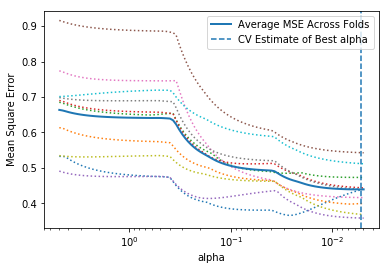

In [5]:
plot.figure()
plot.plot(wineModel.alphas_, wineModel.mse_path_, ':')
plot.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1),
         label='Average MSE Across Folds', linewidth=2)
plot.axvline(wineModel.alpha_, linestyle='--',
            label='CV Estimate of Best alpha')
plot.semilogx()
plot.legend()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Mean Square Error')
plot.axis('tight')
plot.show()

## 上面的例子没有对特征做归一化处理

In [6]:
from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()




In [15]:
# X_norm =min_max_scaler.fit_transform(X)
X_scaled = preprocessing.scale(X)
y_scaled=preprocessing.scale(y)
wineModel = LassoCV(cv=10).fit(X_scaled, y_scaled)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


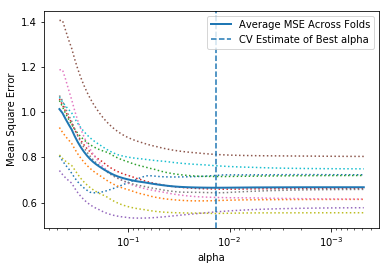

In [16]:
plot.figure()
plot.plot(wineModel.alphas_, wineModel.mse_path_, ':')
plot.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1),
         label='Average MSE Across Folds', linewidth=2)
plot.axvline(wineModel.alpha_, linestyle='--',
            label='CV Estimate of Best alpha')
plot.semilogx()
plot.legend()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Mean Square Error')
plot.axis('tight')
plot.show()

## 上图是将X，y都归一化处理后

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


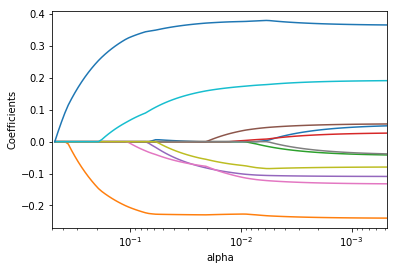

In [26]:
alphas, coefs, _  = linear_model.lasso_path(X_scaled, y_scaled,  return_models=False)
# coefs.shape,alphas.shape
plot.plot(alphas,coefs.T)

plot.xlabel('alpha')
plot.ylabel('Coefficients')
plot.axis('tight')
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.show()


In [ ]:
用套索模型展示te